In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import spacy
import scattertext as st
from IPython.display import display, Markdown

from nltk.sentiment.util import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
import numpy as np
matplotlib.style.use('bmh')
%matplotlib inline

In [3]:
#api_key = 'UB5zJap9jRWcjV0fcyUUSBBjDg357pTNRivhKy6V_GiF'
#url = 'https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/864cdb9c-478b-42f8-be8d-8bfc90388aab'

In [4]:
#from ibm_watson import DiscoveryV1
#from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [5]:
#authenticator = IAMAuthenticator('api_key', url = '<iam_url>')
#discovery = DiscoveryV1(version = '2018-08-01', authenticator=authenticator)
#discovery.set_service_url('<url_as_per_region>')

In [2]:
#from ibm_watson import NaturalLanguageUnderstandingV1
#from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, SentimentOptions, CategoriesOptions

In [2]:
import glob
import config
import warnings
warnings.filterwarnings('ignore')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [3]:
blm_tweets = pd.read_csv('Cleaned_BLM_Tweets.csv', index_col=0 )
blm_tweets.head()

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized
0,2020-06-24 16:59:09,['#blm'],20.0,"NO JUSTICE, NO PEACE #BLM",satanic_syd,NO JUSTICE NO PEACE BLM,"['no', 'justice', 'no', 'peace', 'blm', '']","['justice', 'peace', 'blm', '']","['justic', 'peac', 'blm', '']","['justice', 'peace', 'blm', '']"
1,2020-06-24 16:52:19,"['#poem', '#motivation', '#blm']",206.0,Funny thing\nAbout life is\nYou’ll always be t...,derickijohnson,Funny thing\nAbout life is\nYou’ll always be t...,"['funny', 'thing', 'about', 'life', 'is', 'you...","['funny', 'thing', 'life', 'always', 'one', 'e...","['funni', 'thing', 'life', 'alway', 'one', 'el...","['funny', 'thing', 'life', 'always', 'one', 'e..."
2,2020-06-24 16:47:56,['#blm'],23.0,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,AngelofLightLit,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,"['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'woman', 'protect', 'blac..."
3,2020-06-24 16:46:02,['#blm'],147.0,My kid wrote #blm in chalk on my driveway and ...,Majhatesall,My kid wrote blm in chalk on my driveway and I...,"['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '..."
4,2020-06-24 16:43:54,"['#auspol', '#blm', '#racismeantiblancs', '#vi...",24.0,"Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...",CaroDiRusso,Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...,"['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrat', 'repent', 'repeat', ...","['genuflect', 'prostrate', 'repent', 'repeat',..."


In [4]:
blm_tweets.dtypes

date                object
hashtags            object
nlikes              object
tweet               object
username            object
tweet_punct         object
tweet_tokenized     object
tweet_nonstop       object
tweet_stemmed       object
tweet_lemmatized    object
dtype: object

In [5]:
blm_tweets['date'] = pd.to_datetime(blm_tweets['date'], infer_datetime_format=True, errors='coerce')
blm_tweets.dtypes

date                datetime64[ns]
hashtags                    object
nlikes                      object
tweet                       object
username                    object
tweet_punct                 object
tweet_tokenized             object
tweet_nonstop               object
tweet_stemmed               object
tweet_lemmatized            object
dtype: object

In [6]:
blm_tweets['nlikes'] = pd.to_numeric(blm_tweets['nlikes'], errors='coerce')
blm_tweets.dtypes

date                datetime64[ns]
hashtags                    object
nlikes                     float64
tweet                       object
username                    object
tweet_punct                 object
tweet_tokenized             object
tweet_nonstop               object
tweet_stemmed               object
tweet_lemmatized            object
dtype: object

In [7]:
blm_tweets.isna().sum()

date                4
hashtags            0
nlikes              4
tweet               0
username            2
tweet_punct         2
tweet_tokenized     4
tweet_nonstop       4
tweet_stemmed       4
tweet_lemmatized    4
dtype: int64

In [8]:
blm_tweets = blm_tweets.dropna()

In [9]:
blm_tweets.isna().sum()

date                0
hashtags            0
nlikes              0
tweet               0
username            0
tweet_punct         0
tweet_tokenized     0
tweet_nonstop       0
tweet_stemmed       0
tweet_lemmatized    0
dtype: int64

In [10]:
def wordcloud(tweets, col):
    '''The function takes in two input values the first is the dataframe you want to use and the second is the column in '' you want to make a wordcloud of the words in the specified column'''
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color = "black", stopwords=stopwords, random_state=2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Tweets with the #BLM')

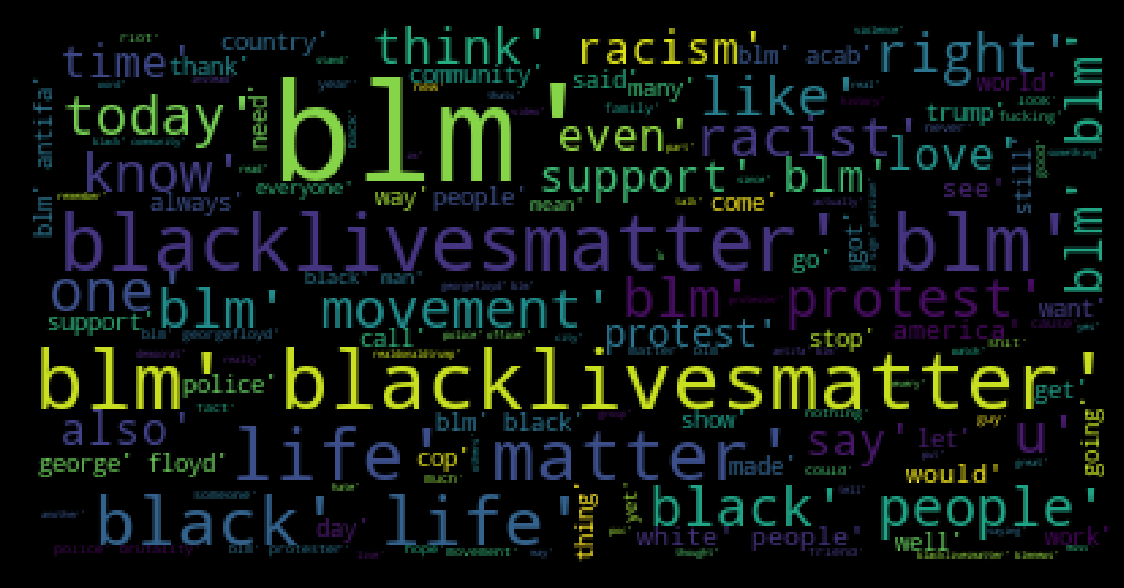

In [11]:
wordcloud(blm_tweets, 'tweet_lemmatized')

In [12]:
blm_tweets['tweet_lemmatized'] = blm_tweets['tweet_lemmatized'].str.lower()

In [13]:
blm_tweets = blm_tweets.drop_duplicates()
blm_tweets.shape

(220504, 10)

In [14]:
blm_tweets['len'] = np.array([len(tweet) for tweet in blm_tweets['tweet']])
blm_tweets.head()

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,len
0,2020-06-24 16:59:09,['#blm'],20.0,"NO JUSTICE, NO PEACE #BLM",satanic_syd,NO JUSTICE NO PEACE BLM,"['no', 'justice', 'no', 'peace', 'blm', '']","['justice', 'peace', 'blm', '']","['justic', 'peac', 'blm', '']","['justice', 'peace', 'blm', '']",27
1,2020-06-24 16:52:19,"['#poem', '#motivation', '#blm']",206.0,Funny thing\nAbout life is\nYou’ll always be t...,derickijohnson,Funny thing\nAbout life is\nYou’ll always be t...,"['funny', 'thing', 'about', 'life', 'is', 'you...","['funny', 'thing', 'life', 'always', 'one', 'e...","['funni', 'thing', 'life', 'alway', 'one', 'el...","['funny', 'thing', 'life', 'always', 'one', 'e...",264
2,2020-06-24 16:47:56,['#blm'],23.0,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,AngelofLightLit,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,"['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'woman', 'protect', 'blac...",65
3,2020-06-24 16:46:02,['#blm'],147.0,My kid wrote #blm in chalk on my driveway and ...,Majhatesall,My kid wrote blm in chalk on my driveway and I...,"['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...",278
4,2020-06-24 16:43:54,"['#auspol', '#blm', '#racismeantiblancs', '#vi...",24.0,"Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...",CaroDiRusso,Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...,"['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrat', 'repent', 'repeat', ...","['genuflect', 'prostrate', 'repent', 'repeat',...",96


In [15]:
mean = np.mean(blm_tweets['len'])
print("The average length of the tweets: {} words.".format(round(mean),2))

The average length of the tweets: 170.0 words.


In [16]:
# Highlighting the tweet with the most likes
fav_max = np.max(blm_tweets['nlikes'])

fav = blm_tweets[blm_tweets['nlikes'] == fav_max].index[0]

print("The tweet with the most likes is: \n{}".format(blm_tweets['tweet'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(blm_tweets['len'][fav]))

The tweet with the most likes is: 
This man is on one knee. Bearing his heart & his soul. He possesses pain they could never know. Anger they could never fathom. Yet he is on one knee, pleading, peacefully. And he is taken away in handcuffs. This has to stop #BLM  
Number of likes: 234401.0
230 characters.



In [17]:
# Timeseries
tlen = pd.Series(data=blm_tweets['len'].values, index=blm_tweets['date'])
tfav = pd.Series(data=blm_tweets['nlikes'].values, index=blm_tweets['date'])

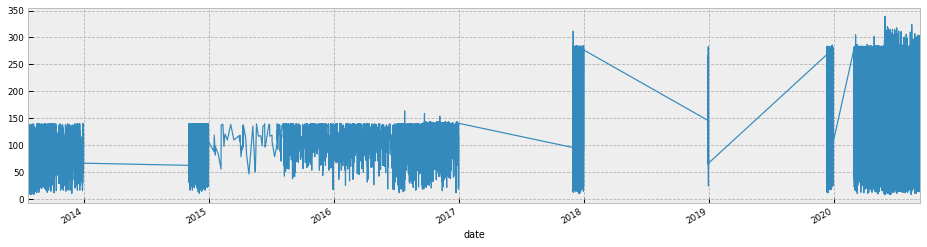

In [62]:
# Lengths along time
tlen.plot(figsize=(16,4))

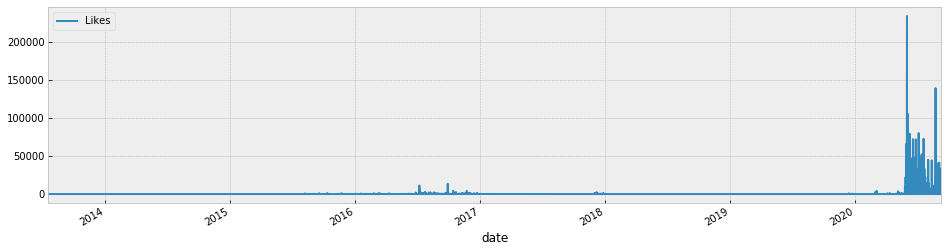

In [19]:
# Likes visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)

In [20]:
blm_tweets['year'] = blm_tweets['date'].dt.strftime('%Y')
blm_tweets['month'] = blm_tweets['date'].dt.strftime('%m')

In [21]:
blm_tweets.head()

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,len,year,month
0,2020-06-24 16:59:09,['#blm'],20.0,"NO JUSTICE, NO PEACE #BLM",satanic_syd,NO JUSTICE NO PEACE BLM,"['no', 'justice', 'no', 'peace', 'blm', '']","['justice', 'peace', 'blm', '']","['justic', 'peac', 'blm', '']","['justice', 'peace', 'blm', '']",27,2020,06
1,2020-06-24 16:52:19,"['#poem', '#motivation', '#blm']",206.0,Funny thing\nAbout life is\nYou’ll always be t...,derickijohnson,Funny thing\nAbout life is\nYou’ll always be t...,"['funny', 'thing', 'about', 'life', 'is', 'you...","['funny', 'thing', 'life', 'always', 'one', 'e...","['funni', 'thing', 'life', 'alway', 'one', 'el...","['funny', 'thing', 'life', 'always', 'one', 'e...",264,2020,06
2,2020-06-24 16:47:56,['#blm'],23.0,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,AngelofLightLit,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,"['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'woman', 'protect', 'blac...",65,2020,06
3,2020-06-24 16:46:02,['#blm'],147.0,My kid wrote #blm in chalk on my driveway and ...,Majhatesall,My kid wrote blm in chalk on my driveway and I...,"['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...",278,2020,06
4,2020-06-24 16:43:54,"['#auspol', '#blm', '#racismeantiblancs', '#vi...",24.0,"Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...",CaroDiRusso,Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...,"['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrat', 'repent', 'repeat', ...","['genuflect', 'prostrate', 'repent', 'repeat',...",96,2020,06


In [22]:
blm_tweets['hashtags'].value_counts()

['#blm']                                                                                                                                                                     84074
['#blacklivesmatter', '#blm']                                                                                                                                                 4319
['#blm', '#blacklivesmatter']                                                                                                                                                 4175
['#blm', '#blacklivesmatter', '#blmnews']                                                                                                                                     1615
['#happyjune2020', '#blm', '#followme', '#ifb', '#teamsil', '#f4f', '#retweet', '#ifollowbackinstantly', '#takipclub', '#1first', '#teamstallion', '#1ddrive', '#resist']      911
                                                                                                         

In [23]:
blm_tweets['username'].value_counts()

BLM_Report         1635
hungrybowtie       1180
DrLindaShelton     1170
djtroops            912
blacklionmusic      803
                   ... 
tinychaosmouse        1
bellaski3             1
EmbersLlc             1
RiseLeadWomen         1
wdmikjaggerdoit       1
Name: username, Length: 140012, dtype: int64

In [24]:
blm_tweets['nlikes'].value_counts()

0.0        82429
1.0        28563
2.0        12719
3.0         7208
4.0         4689
           ...  
19645.0        1
11548.0        1
1286.0         1
4914.0         1
3071.0         1
Name: nlikes, Length: 2078, dtype: int64

In [25]:
blm_tweets.describe()

,nlikes,len
count,220504.000000,220504.000000
mean,53.011156,169.516943
std,969.974984,80.491689
min,0.000000,9.000000
25%,0.000000,100.000000
50%,1.000000,167.000000
75%,18.000000,251.000000
max,234401.000000,339.000000


In [26]:
# Creating a column based on how many likes the tweet received
blm_tweets.loc[blm_tweets['nlikes'] > 10, 'liked'] = 'popular'
blm_tweets.loc[blm_tweets['nlikes'] < 10, 'liked'] = 'not_popular'

In [27]:
blm_tweets.head()

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,len,year,month,liked
0,2020-06-24 16:59:09,['#blm'],20.0,"NO JUSTICE, NO PEACE #BLM",satanic_syd,NO JUSTICE NO PEACE BLM,"['no', 'justice', 'no', 'peace', 'blm', '']","['justice', 'peace', 'blm', '']","['justic', 'peac', 'blm', '']","['justice', 'peace', 'blm', '']",27,2020,06,popular
1,2020-06-24 16:52:19,"['#poem', '#motivation', '#blm']",206.0,Funny thing\nAbout life is\nYou’ll always be t...,derickijohnson,Funny thing\nAbout life is\nYou’ll always be t...,"['funny', 'thing', 'about', 'life', 'is', 'you...","['funny', 'thing', 'life', 'always', 'one', 'e...","['funni', 'thing', 'life', 'alway', 'one', 'el...","['funny', 'thing', 'life', 'always', 'one', 'e...",264,2020,06,popular
2,2020-06-24 16:47:56,['#blm'],23.0,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,AngelofLightLit,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,"['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'woman', 'protect', 'blac...",65,2020,06,popular
3,2020-06-24 16:46:02,['#blm'],147.0,My kid wrote #blm in chalk on my driveway and ...,Majhatesall,My kid wrote blm in chalk on my driveway and I...,"['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...",278,2020,06,popular
4,2020-06-24 16:43:54,"['#auspol', '#blm', '#racismeantiblancs', '#vi...",24.0,"Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...",CaroDiRusso,Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...,"['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrat', 'repent', 'repeat', ...","['genuflect', 'prostrate', 'repent', 'repeat',...",96,2020,06,popular


In [28]:
#from ibm_watson import DiscoveryV1
#from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

#authenticator = IAMAuthenticator('api_key', url = '<iam_url>')
#discovery = DiscoveryV1(version='2018-08-01', authenticator=authenticator)
#discovery.set_service_url('<url_as_per_region>')

In [29]:
# VaderSentiment Analyser
analyser = SentimentIntensityAnalyzer()

# IBM-Watson Sentiment Analyser
#natural_language_understanding = NaturalLanguageUnderstandingV1(version='2018-11-16', authenticator=authenticator)

def analyze_text(input_text, analyzer):
    if analyzer == 'VADER':
        result = analyser.polarity_scores(input_text)
        score = result['compound']
    elif analyzer == 'TextBlob':
        score = TextBlob(input_text).sentiment.polarity
    #else:
        #response = natural_language_understanding.analyze(text = input_text, features = Features(sentiment=SentimentOptions()), language='en').get_result()
        #score = response.get('sentiment').get('document').get('score')
    return score

In [30]:
# Adding columns with the polarity scores from the VADER and TextBlob sentiment analyzers
blm_tweets['vader_sent'] = blm_tweets['tweet_lemmatized'].apply(analyze_text, analyzer='VADER')
blm_tweets['textblob_sent'] = blm_tweets['tweet_lemmatized'].apply(analyze_text, analyzer='TextBlob')
#blm_tweets['IBM_sent'] = blm_tweets['tweet_lemmatized'].apply(analyze_text, analyzer='Ibm')
blm_tweets.head()

,date,hashtags,nlikes,tweet,username,tweet_punct,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized,len,year,month,liked,vader_sent,textblob_sent
0,2020-06-24 16:59:09,['#blm'],20.0,"NO JUSTICE, NO PEACE #BLM",satanic_syd,NO JUSTICE NO PEACE BLM,"['no', 'justice', 'no', 'peace', 'blm', '']","['justice', 'peace', 'blm', '']","['justic', 'peac', 'blm', '']","['justice', 'peace', 'blm', '']",27,2020,06,popular,0.7845,0.000000
1,2020-06-24 16:52:19,"['#poem', '#motivation', '#blm']",206.0,Funny thing\nAbout life is\nYou’ll always be t...,derickijohnson,Funny thing\nAbout life is\nYou’ll always be t...,"['funny', 'thing', 'about', 'life', 'is', 'you...","['funny', 'thing', 'life', 'always', 'one', 'e...","['funni', 'thing', 'life', 'alway', 'one', 'el...","['funny', 'thing', 'life', 'always', 'one', 'e...",264,2020,06,popular,0.9081,0.366667
2,2020-06-24 16:47:56,['#blm'],23.0,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,AngelofLightLit,PROTECT BLACK WOMEN\nPROTECT BLACK MEN\nPROTEC...,"['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'women', 'protect', 'blac...","['protect', 'black', 'woman', 'protect', 'blac...",65,2020,06,popular,0.7783,-0.166667
3,2020-06-24 16:46:02,['#blm'],147.0,My kid wrote #blm in chalk on my driveway and ...,Majhatesall,My kid wrote blm in chalk on my driveway and I...,"['my', 'kid', 'wrote', 'blm', 'in', 'chalk', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...","['kid', 'wrote', 'blm', 'chalk', 'driveway', '...",278,2020,06,popular,0.0000,0.100000
4,2020-06-24 16:43:54,"['#auspol', '#blm', '#racismeantiblancs', '#vi...",24.0,"Genuflect, prostrate, repent.\n\nRepeat.\n\n🤢🤢...",CaroDiRusso,Genuflect prostrate repent\n\nRepeat\n\n🤢🤢🤢\na...,"['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrate', 'repent', 'repeat',...","['genuflect', 'prostrat', 'repent', 'repeat', ...","['genuflect', 'prostrate', 'repent', 'repeat',...",96,2020,06,popular,0.0000,0.000000


In [31]:
print("3 Tweets with the Highest Polarity Based on VADER:")
for index, tweet in enumerate(blm_tweets.iloc[blm_tweets['vader_sent'].sort_values(ascending=False)[:3].index]['tweet']):
    print('Tweet {}:\n'.format(index+1), tweet)

3 Tweets with the Highest Polarity Based on VADER:
Tweet 1:
 We can’t talk because we will be victimized, we can’t talk cause they will take away the bread that we feed our families with. We can’t talk cause we are quota players. There’s always their side of the story! #SayNoToRacism #BLM #Equality
Tweet 2:
 Cop Suspended After Commenting 'KILL THEM ALL' on #BLM Protest

Sgt. #KeithWrede, who has been with the Colorado Springs Police Department for 20 years, has been issued a 40-hour suspension resulting in over $2,000 in lost wages 

NO, MUST BE FIRED!

#MOG  …
Tweet 3:
 jumping 2 conclusions the problem w/ dis world,jumping 2 conclusions is wht kills innocent black ppl evryday. if we could all try not 2 trend this situ tht would b alot better.we need 2 focus on what's important evn tho we may want to stand up 4 our boys ♡ #RAISETHEDEGREE #BLM


In [32]:
print("3 Tweets with the Highest Polarity Based on TextBlob:")
for index, tweet in enumerate(blm_tweets.iloc[blm_tweets['textblob_sent'].sort_values(ascending=False)[:3].index]['tweet']):
    print('Tweet {}:\n'.format(index+1), tweet)

3 Tweets with the Highest Polarity Based on TextBlob:
Tweet 1:
 I keep losing so many followers on my IG because I still keep active & posting about #BLM , but I can care less about the followers. 
I think it’s important to share messages & keep educating ourself.
Tweet 2:
 Why is every white person obsessed with their ancestors being from another country thinking its quirky but be mad about immigrants and #BLM
Tweet 3:
 Joe: "I don't want to defund police departments. I think they need more help..."

Kamala: *nods & laughs*

2hrs later Jacob Blake was shot in the back by police. These are the results of racist crime bills, patriot act, neoliberal support of the prison industrial complex. #BLM  


In [33]:
print("3 Tweets with the Lowest Polarity Based on VADER:")
for index, tweet in enumerate(blm_tweets.iloc[blm_tweets['vader_sent'].sort_values(ascending=True)[:3].index]['tweet']):
    print('Tweet {}:\n'.format(index+1), tweet)

3 Tweets with the Lowest Polarity Based on VADER:
Tweet 1:
 “All” means all - ESPECIALLY your family member, Karen. 

#GeorgeFloyd #BlackLivesMatter #BLM #Minneapolis #ACAB   …
Tweet 2:
 “this drama makes me wanna delete twt” if you checked ur privilege more often you would realize that racism, the “drama” you speak of, is actually black people’s reality. your invalidation & dismissal only makes matters worse. google is your friend, please educate yourselves #BLM
Tweet 3:
 It's sad n rough day 4 white supremacist & EDl British fist on London Protest last night Saturday LuL 😋 #UK #EU #BlackLivesMatter #Blm 🙏#BrexitUK #Brexit #PostBrexitUK #londonprotest #London


In [34]:
print("3 Tweets with the Lowest Polarity Based on VADER:")
for index, tweet in enumerate(blm_tweets.iloc[blm_tweets['textblob_sent'].sort_values(ascending=True)[:3].index]['tweet']):
    print('Tweet {}:\n'.format(index+1), tweet)

3 Tweets with the Lowest Polarity Based on VADER:
Tweet 1:
 It’s not a joke.... #BLM   …
Tweet 2:
 We Also Face a Pandemic of Racism   … As our nation’s leader continues to espouse divisive rhetoric that emboldens people to act out in aggressive ways, some Americans have sunk to a new low. #Blacklivesmatter #ahmaudarbery #BreonnaTaylor #BLM
Tweet 3:
 "We must fight!" He's right. You have to fight against the injustice. Black people are being *M U R D E R E D*! Rise up and take over by force if you must! #acab1312 #blm #BLACK_LIVES_MATTER  …


In [35]:
# Comparing the two sentiment labeling 
print("Vader Sentiment Value Statistics", blm_tweets['vader_sent'].describe())
print("\n")
print("Textblob Sentiment Value Statistics", blm_tweets['textblob_sent'].describe())

Vader Sentiment Value Statistics count    220504.000000
mean         -0.048036
std           0.547268
min          -0.997500
25%          -0.542300
50%           0.000000
75%           0.409000
max           0.996900
Name: vader_sent, dtype: float64


Textblob Sentiment Value Statistics count    220504.000000
mean          0.034527
std           0.260209
min          -1.000000
25%          -0.066667
50%           0.000000
75%           0.150000
max           1.000000
Name: textblob_sent, dtype: float64


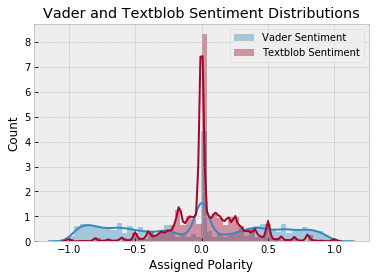

In [36]:
# Comparing the distributions of sentiment
sns.distplot(blm_tweets['vader_sent'], label='Vader Sentiment', axlabel='Sentiment')
sns.distplot(blm_tweets['textblob_sent'], label='Textblob Sentiment', axlabel='Sentiment')
plt.legend()
plt.title('Vader and Textblob Sentiment Distributions')
plt.xlabel('Assigned Polarity')
plt.ylabel('Count')
plt.show()

From the distributions above we can see that there is a similar spread, it seems that Vader is more likely to assign polarity even though both are centered around 0, textblob has a majority of the assigned sentiment to be centered around 0 while Vader is more like to assign not 0. 

In [37]:
blm_tweets['avg_sent'] = (blm_tweets['vader_sent'] + blm_tweets['textblob_sent'])/2
blm_tweets['avg_sent'].describe()

count    220504.000000
mean         -0.006755
std           0.352523
min          -0.994250
25%          -0.286618
50%           0.000000
75%           0.250000
max           0.979500
Name: avg_sent, dtype: float64

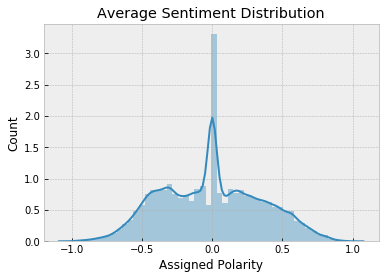

In [38]:
# Comparing the distributions of sentiment
sns.distplot(blm_tweets['avg_sent'], label='Average Sentiment')
plt.title('Average Sentiment Distribution')
plt.xlabel('Assigned Polarity')
plt.ylabel('Count')
plt.show()

In [39]:
blm_tweets['avg_sent'].value_counts()

 0.000000    23733
-0.125000     2609
 0.125000     1599
 0.200950     1428
 0.180600     1299
             ...  
-0.191394        1
-0.334804        1
-0.305870        1
-0.525500        1
 0.533200        1
Name: avg_sent, Length: 66435, dtype: int64

In [40]:
blm_tweets['vader_sent'].value_counts()

 0.0000    35131
-0.2500     4113
 0.0258     3289
 0.4019     3053
 0.3612     2793
           ...  
 0.9465        1
 0.7876        1
-0.6254        1
 0.8376        1
 0.8036        1
Name: vader_sent, Length: 8367, dtype: int64

In [41]:
blm_tweets['textblob_sent'].value_counts()

 0.000000    66630
-0.166667     7718
 0.500000     5601
 0.250000     5529
 0.200000     3924
             ...  
 0.255556        1
 0.025902        1
 0.131457        1
 0.051667        1
-0.429654        1
Name: textblob_sent, Length: 12005, dtype: int64

The value counts affirms the thought that textblob is less likely to assign polarity. Using the average polarity means more tweets have an assigned polarity so I will use this to further investigate.

In [42]:
# Pivot table to look at sentiment comparing months and years
piv = pd.pivot_table(blm_tweets, index=['month'], columns = ['year'], values = ['avg_sent'])
piv.head()

avg_sent                                                  
year      2013 2014      2015      2016 2017 2018 2019      2020
month                                                           
01         NaN  NaN  0.296388  0.008353  NaN  NaN  NaN       NaN
02         NaN  NaN  0.220551  0.003445  NaN  NaN  NaN -0.046753
03         NaN  NaN -0.050062 -0.070840  NaN  NaN  NaN -0.069533
04         NaN  NaN -0.053781 -0.039027  NaN  NaN  NaN -0.069022
05         NaN  NaN -0.071031 -0.003586  NaN  NaN  NaN -0.053663

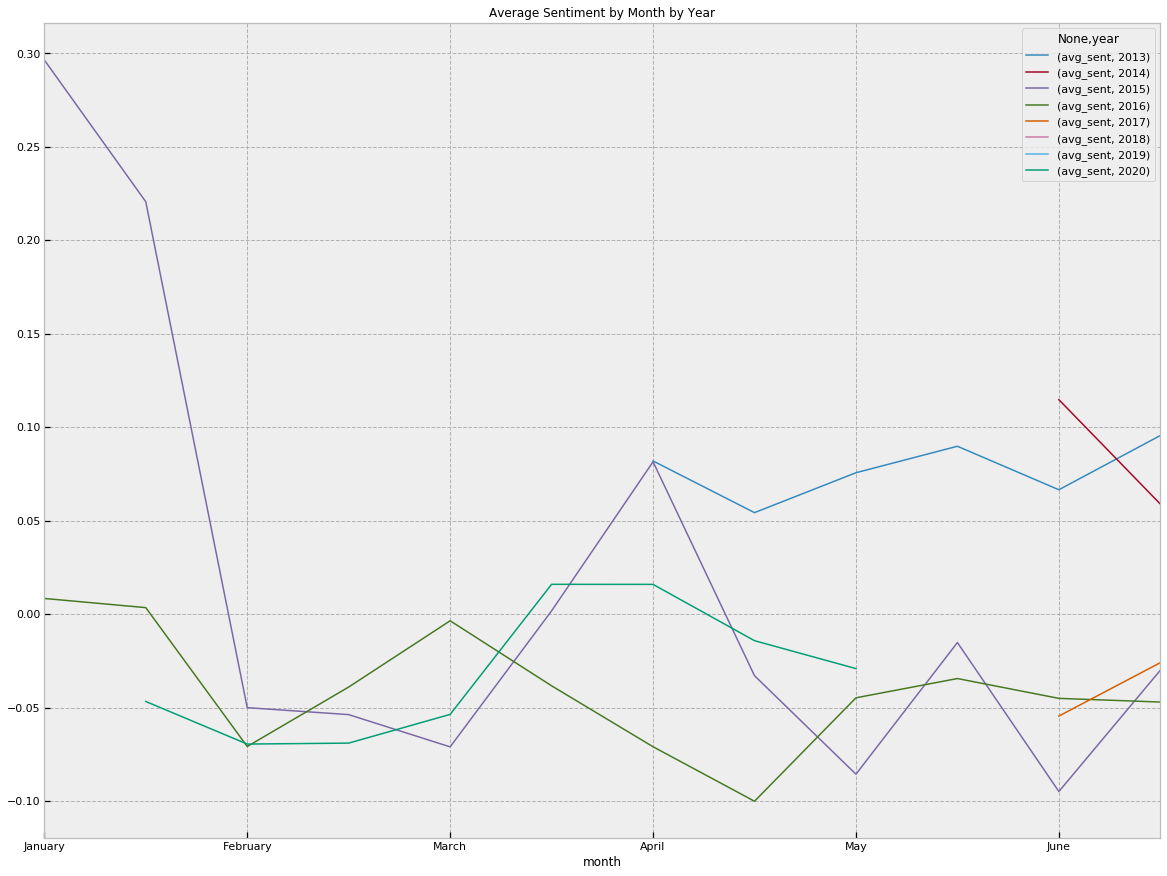

In [43]:
sns.set_context('notebook')
ax = piv.plot(figsize=(20,15))
ax.set_title('Average Sentiment by Month by Year')
ax.set_xticklabels(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

## Text Analyziation

Looking at the top words used

In [44]:
def get_top_n_words(corpus, n=None):
    '''This function takes in two inputs, the corpus or the text and n. It runs through the corpus and counts the frequency and reports back the top n words used in the corpus.'''
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
    

In [45]:
common_words = get_top_n_words(blm_tweets['tweet_lemmatized'], 53)
for word, freq in common_words:
    print(word, freq)

blm 225807
black 43543
blacklivesmatter 38911
people 31554
protest 22431
life 21391
police 18410
white 17913
matter 15205
like 14276
right 12702
one 12696
need 12204
get 12009
support 11544
racism 11441
racist 11418
time 10548
see 10196
know 9878
movement 9699
please 9461
say 9348
want 9144
today 9129
make 8982
justice 8917
georgefloyd 8521
dont 8384
cop 7891
change 7833
trump 7593
go 7531
would 7349
let 7118
going 7098
man 6985
stop 6809
still 6782
day 6769
think 6718
take 6571
love 6404
stand 6279
thing 6076
way 5987
im 5915
many 5903
community 5852
help 5747
year 5639
antifa 5625
even 5585


In [46]:
# Removing the search word blm
common_words = common_words[1:53]
common_words

[('black', 43543),
 ('blacklivesmatter', 38911),
 ('people', 31554),
 ('protest', 22431),
 ('life', 21391),
 ('police', 18410),
 ('white', 17913),
 ('matter', 15205),
 ('like', 14276),
 ('right', 12702),
 ('one', 12696),
 ('need', 12204),
 ('get', 12009),
 ('support', 11544),
 ('racism', 11441),
 ('racist', 11418),
 ('time', 10548),
 ('see', 10196),
 ('know', 9878),
 ('movement', 9699),
 ('please', 9461),
 ('say', 9348),
 ('want', 9144),
 ('today', 9129),
 ('make', 8982),
 ('justice', 8917),
 ('georgefloyd', 8521),
 ('dont', 8384),
 ('cop', 7891),
 ('change', 7833),
 ('trump', 7593),
 ('go', 7531),
 ('would', 7349),
 ('let', 7118),
 ('going', 7098),
 ('man', 6985),
 ('stop', 6809),
 ('still', 6782),
 ('day', 6769),
 ('think', 6718),
 ('take', 6571),
 ('love', 6404),
 ('stand', 6279),
 ('thing', 6076),
 ('way', 5987),
 ('im', 5915),
 ('many', 5903),
 ('community', 5852),
 ('help', 5747),
 ('year', 5639),
 ('antifa', 5625),
 ('even', 5585)]

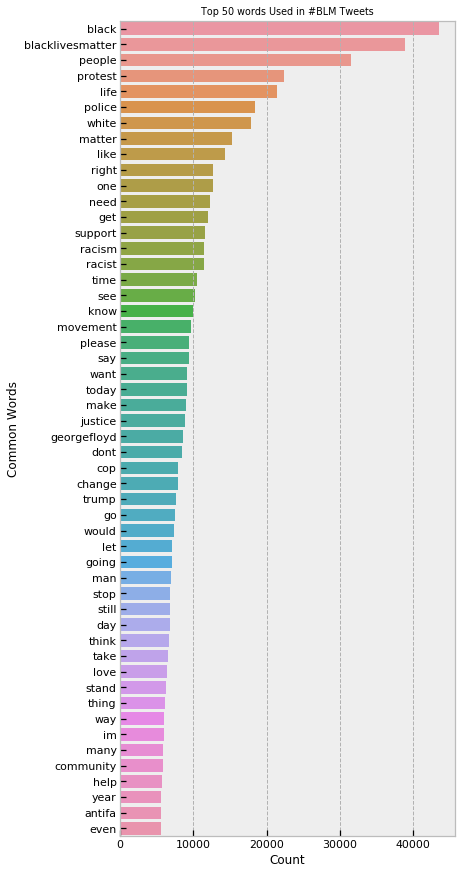

In [47]:
top_words_df = pd.DataFrame(common_words, columns = ['TweetText', 'count'])
f, ax = plt.subplots(figsize = (6, 15))
sns.set_context('paper')

sns.barplot(x =top_words_df['count'] , y = top_words_df['TweetText'])
plt.title('Top 50 words Used in #BLM Tweets')
plt.xlabel('Count')
plt.ylabel('Common Words')
plt.show()

Looking at the top Bigrams used (words next to each other)

In [48]:
def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [49]:
common_bigrams = get_top_n_bigrams(blm_tweets['tweet_lemmatized'], 50)
for word, freq in common_bigrams:
    print(word, freq)

blm blacklivesmatter 13954
blacklivesmatter blm 12706
life matter 10697
black life 10059
blm protest 5933
black people 5431
blm movement 5074
support blm 3833
white people 3084
george floyd 3054
blm acab 2264
blm antifa 2045
black man 2022
matter blm 1967
blm georgefloyd 1934
blm protester 1893
police brutality 1866
antifa blm 1691
georgefloyd blm 1683
police officer 1674
sign petition 1660
blacklivesmatter blmnews 1637
black community 1616
peaceful protest 1456
protest blm 1432
blacklivesmatter protest 1392
newpost blm 1356
black men 1260
oregon blm 1207
blm justiceforgeorgefloyd 1191
blm lgbtq 1162
social medium 1136
black woman 1106
last week 1092
change blm 1083
like blm 1082
genx millenials 1078
aarp veteran 1049
veteran metoo 1049
via youtube 1035
people blm 1031
look like 1027
acab blm 1020
portland oregon 1013
metoo genx 1011
make sure 1006
matter black 1000
stay safe 991
latinx blm 980
supporting blm 978


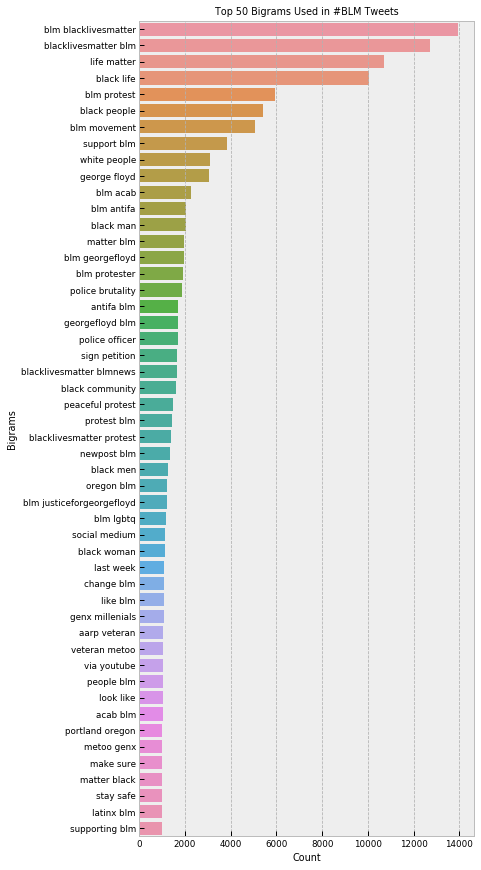

In [50]:
bigram_df = pd.DataFrame(common_bigrams, columns = ['TweetText', 'count'])
f, ax = plt.subplots(figsize = (6, 15))
sns.set_context('paper')
sns.barplot(x =bigram_df['count'] , y = bigram_df['TweetText'])
plt.title('Top 50 Bigrams Used in #BLM Tweets')
plt.xlabel('Count')
plt.ylabel('Bigrams')
plt.show()

In [51]:
bigrams_blm = common_bigrams[3:]

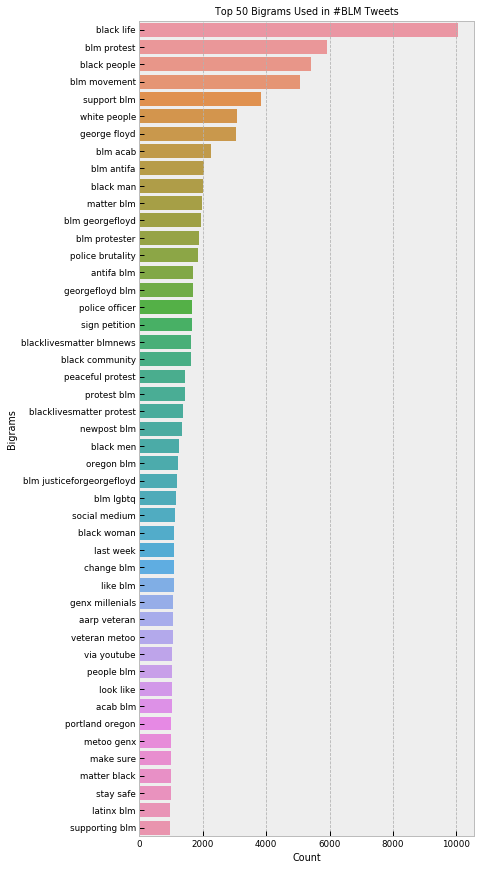

In [52]:
bigram_df2 = pd.DataFrame(bigrams_blm, columns = ['TweetText', 'count'])
f, ax = plt.subplots(figsize = (6, 15))
sns.set_context('paper')
sns.barplot(x =bigram_df2['count'] , y = bigram_df2['TweetText'])
plt.title('Top 50 Bigrams Used in #BLM Tweets')
plt.xlabel('Count')
plt.ylabel('Bigrams')
plt.show()

Looking at the top 3 words or trigrams that are next to each other

In [53]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return words_freq[:n]

In [54]:
trigrams = get_top_n_trigram(blm_tweets['tweet_lemmatized'], 50)
for word, freq in trigrams:
    print(word, freq)

justice peace blm 199
funny thing life 1
thing life always 1
life always one 1
always one else 1
one else prove 1
else prove thing 1
prove thing say 1
thing say compete 1
say compete nurture 1
compete nurture self 1
nurture self true 1
self true build 1
true build leaf 1
build leaf world 1
leaf world better 1
world better cuz 1
better cuz passed 1
cuz passed poem 1
passed poem motivation 1
poem motivation blm 1
protect black woman 20
black woman protect 6
woman protect black 7
protect black men 9
black men protect 3
men protect black 4
protect black child 5
black child blm 7
kid wrote blm 2
wrote blm chalk 1
blm chalk driveway 1
chalk driveway asked 1
driveway asked neighbor 1
asked neighbor blake 1
neighbor blake get 1
blake get rid 1
get rid stir 1
rid stir neighborhood 1
stir neighborhood offered 1
neighborhood offered let 1
offered let wife 1
let wife know 1
wife know year 1
know year old 4
year old come 1
old come house 1
come house minute 1
house minute wife 1
minute wife go 1


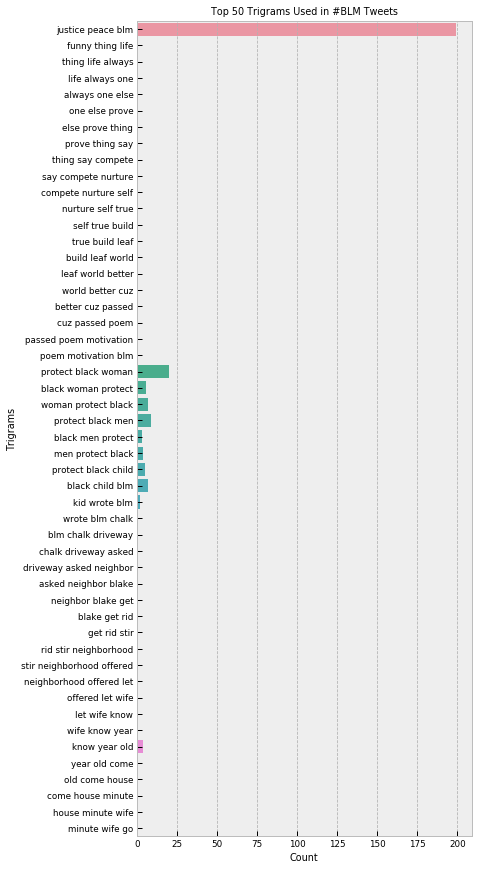

In [55]:
trigram_df = pd.DataFrame(trigrams, columns = ['TweetText', 'count'])
f, ax = plt.subplots(figsize = (6, 15))
sns.set_context('paper')
sns.barplot(x =trigram_df['count'] , y = trigram_df['TweetText'])
plt.title('Top 50 Trigrams Used in #BLM Tweets')
plt.xlabel('Count')
plt.ylabel('Trigrams')
plt.show()

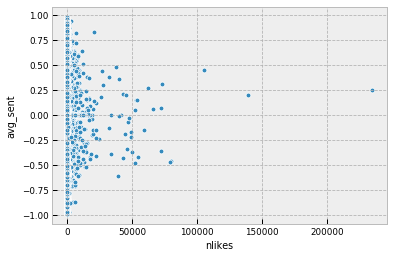

In [56]:
sns.scatterplot(blm_tweets['nlikes'], blm_tweets['avg_sent'])

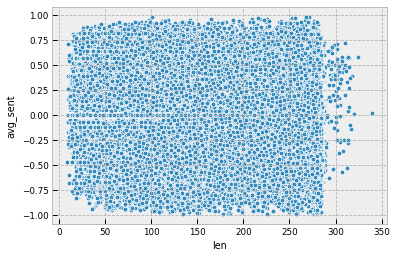

In [57]:
sns.scatterplot(blm_tweets['len'], blm_tweets['avg_sent'])

In [58]:
blm_tweets['liked'].value_counts()

not_popular    146687
popular         72131
Name: liked, dtype: int64

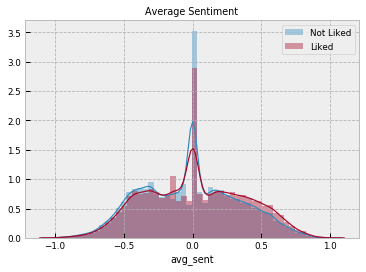

In [59]:
x1 = blm_tweets.loc[blm_tweets['liked'] == 'popular', 'avg_sent']
x0 = blm_tweets.loc[blm_tweets['liked'] == 'not_popular', 'avg_sent']

sns.distplot(x0, label = 'Not Liked')
sns.distplot(x1, label = 'Liked')
plt.title('Average Sentiment')
plt.legend()
plt.show()

Based on the above graph it seems that there's not a difference in liked or not liked tweets based on sentiment

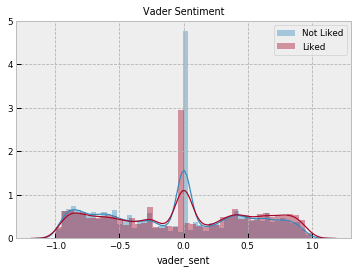

In [60]:
x1 = blm_tweets.loc[blm_tweets['liked'] == 'popular', 'vader_sent']
x0 = blm_tweets.loc[blm_tweets['liked'] == 'not_popular', 'vader_sent']

sns.distplot(x0, label = 'Not Liked')
sns.distplot(x1, label = 'Liked')
plt.title('Vader Sentiment')
plt.legend()
plt.show()

In [61]:
blm_tweets.to_csv('blm_tweets_for_models.csv')